In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [8]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
get_data_dir = os.path.join(parent_dir, 'get_data')
data_dir = os.path.join(get_data_dir, 'output')
file_path = os.path.join(data_dir, 'battles.csv')

output_dir = os.path.join(cwd, 'output')
os.makedirs(output_dir, exist_ok=True)

data = pd.read_csv(file_path)

victors = []

for row in data.itertuples(index=False):
    team1 = [row[8], row[10], row[12]]
    team2 = [row[14], row[16], row[18]]

    if row[4] == 'victory':
        victor = 1 if row[5] in set(team1) else 2
    elif row[4] == 'defeat':
        victor = 2 if row[5] in set(team1) else 1
    else:
        victor = 0
    
    victors.append(victor)

df = data[['Mode', 'Map']]
df.insert(2, 'Victor', victors)
df = pd.concat([df, data.iloc[:, range(8, 19, 2)]], axis=1)

display(df)

,Mode,Map,Victor,"Brawler 1,1","Brawler 1,2","Brawler 1,3","Brawler 2,1","Brawler 2,2","Brawler 2,3"
0,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
1,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
2,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
3,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
4,bounty,Hideout,1,MANDY,GENE,SPROUT,MELODIE,BELLE,BYRON
...,...,...,...,...,...,...,...,...,...
3321,hotZone,Open Business,1,TICK,MEG,NITA,BYRON,BUSTER,DYNAMIKE
3322,hotZone,Open Business,1,TICK,MEG,NITA,BYRON,BUSTER,DYNAMIKE
3323,hotZone,Open Business,2,TICK,MEG,NITA,BYRON,BUSTER,DYNAMIKE
3324,bounty,Canal Grande,2,BERRY,CHESTER,BELLE,EVE,BIBI,MANDY


In [5]:
brawlers = sorted(list(set(df.iloc[:, 3:].to_numpy().ravel())))

winrates = pd.DataFrame({'Wins': [0]*len(brawlers), 'Games': [0]*len(brawlers)})
winrates.insert(0, 'Name', brawlers)

indices = {}

for i in range(len(winrates['Name'])):
    indices[winrates.loc[i, 'Name']] = i

for row in df.itertuples(index=False):
    victor = row[2]
    team1 = row[3:6]
    team2 = row[6:9]

    for brawler in team1:
        winrates.loc[indices[brawler], 'Games'] += 1

        if victor == 1:
            winrates.loc[indices[brawler], 'Wins'] += 1

    for brawler in team2:
        winrates.loc[indices[brawler], 'Games'] += 1

        if victor == 2:
            winrates.loc[indices[brawler], 'Wins'] += 1

rates = winrates['Wins'].div(winrates['Games'])
winrates.insert(3, 'Win Rates', rates)

winrates.to_csv(os.path.join(output_dir, 'winrates.csv'), index=False)

display(winrates)

,Name,Wins,Games,Win Rates
0,8-BIT,36,75,0.480000
1,AMBER,118,267,0.441948
2,ANGELO,221,490,0.451020
3,ASH,12,24,0.500000
4,BARLEY,265,493,0.537525
...,...,...,...,...
77,STU,114,269,0.423792
78,SURGE,237,438,0.541096
79,TARA,25,50,0.500000
80,TICK,91,202,0.450495


,8-BIT,AMBER,ANGELO,ASH,BARLEY,BEA,BELLE,BERRY,BIBI,BO,...,SANDY,SHELLY,SPIKE,SPROUT,SQUEAK,STU,SURGE,TARA,TICK,WILLOW
8-BIT,NaN,0.000000,1.000000,NaN,NaN,0.000000,0.461538,0.000000,NaN,NaN,...,0.500000,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.800000,NaN,NaN
AMBER,1.0,NaN,0.333333,0.666667,0.416667,NaN,0.666667,0.411765,0.500000,0.727273,...,0.250000,0.666667,0.411765,0.600000,0.0,0.411765,0.526316,0.000000,NaN,0.400000
ANGELO,0.0,0.666667,NaN,NaN,0.483871,NaN,0.450980,0.411765,0.500000,0.000000,...,0.400000,0.800000,0.636364,0.586207,NaN,0.555556,0.428571,NaN,0.50,NaN
ASH,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,0.666667,0.600000,0.000000,...,0.800000,NaN,0.333333,0.333333,NaN,NaN,0.000000,NaN,NaN,0.000000
BARLEY,NaN,0.583333,0.516129,NaN,NaN,0.800000,0.400000,0.500000,0.342857,0.000000,...,0.634146,0.750000,0.545455,0.470588,0.0,0.648649,0.533333,NaN,0.68,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STU,NaN,0.588235,0.444444,NaN,0.351351,0.400000,0.500000,0.200000,0.600000,0.000000,...,0.456522,0.000000,0.142857,0.000000,NaN,NaN,0.157895,0.333333,0.70,NaN
SURGE,NaN,0.473684,0.571429,1.000000,0.466667,1.000000,1.000000,0.631579,0.621622,1.000000,...,0.525000,1.000000,0.360000,0.500000,NaN,0.842105,NaN,0.333333,1.00,0.500000
TARA,0.2,1.000000,NaN,NaN,NaN,NaN,0.000000,0.500000,NaN,NaN,...,0.400000,NaN,NaN,NaN,NaN,0.666667,0.666667,NaN,NaN,NaN
TICK,NaN,NaN,0.500000,NaN,0.320000,1.000000,0.680000,NaN,NaN,1.000000,...,0.000000,0.333333,0.500000,0.481481,0.2,0.300000,0.000000,NaN,NaN,0.000000


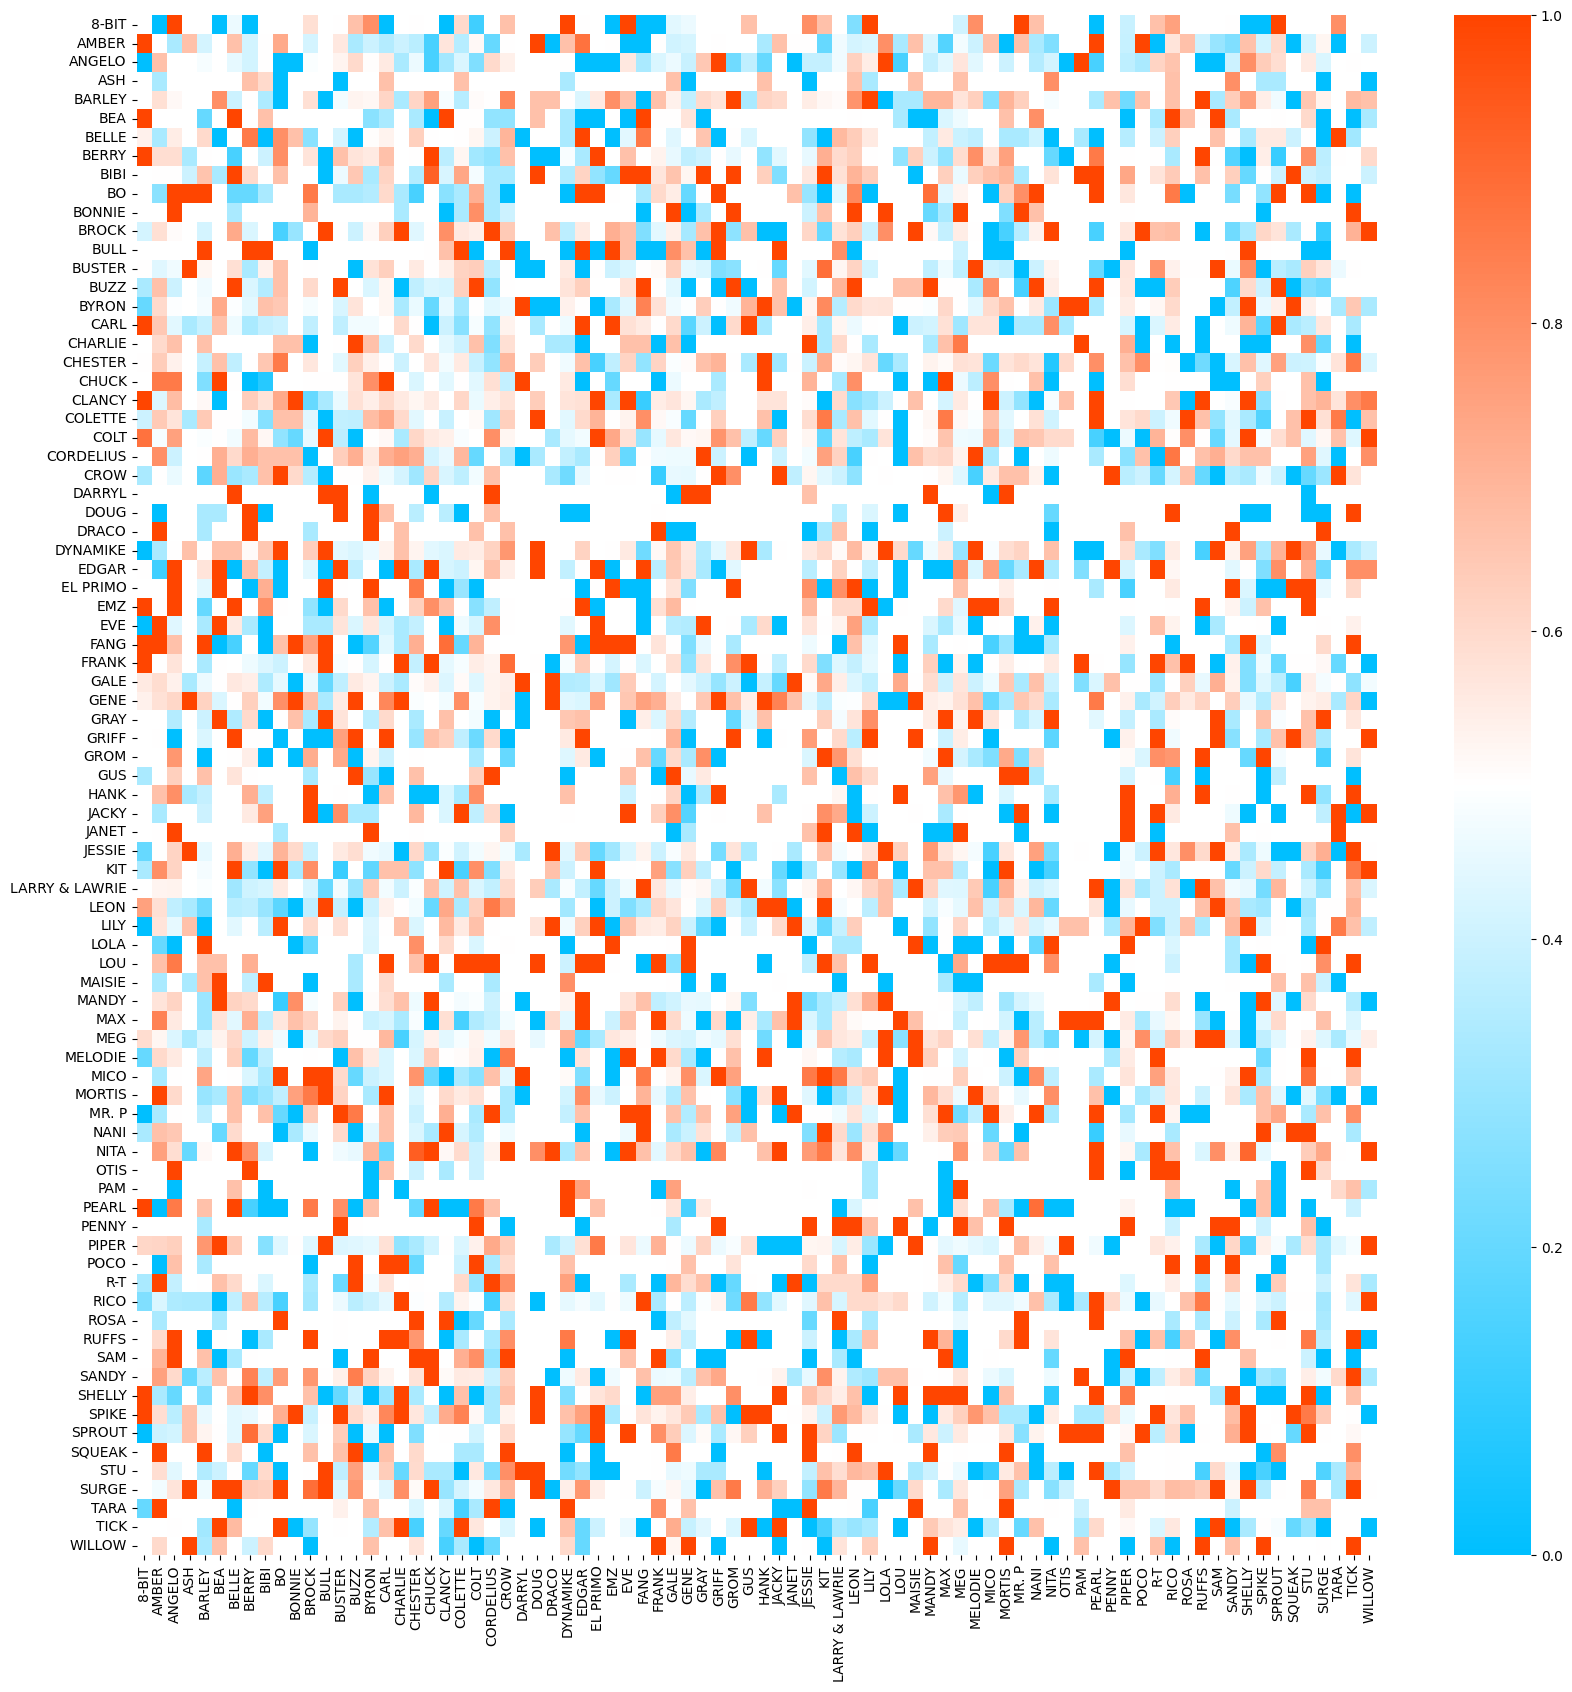

In [14]:
against_wins = pd.DataFrame(index=brawlers, columns=brawlers)
against_wins = against_wins.fillna(0)

against_games = pd.DataFrame(index=brawlers, columns=brawlers)
against_games = against_games.fillna(0)

for row in df.itertuples(index=False):
    victor = row[2]
    
    if victor == 0:
        continue

    team1 = row[3:6]
    team2 = row[6:9]

    for brawler1 in team1:
        for brawler2 in team2:

            against_games.loc[brawler1, brawler2] += 1
            against_games.loc[brawler2, brawler1] += 1
        
            if victor == 1:
                against_wins.loc[brawler1, brawler2] += 1
            else:
                against_wins.loc[brawler2, brawler1] += 1

against_winrates = against_wins.div(against_games)

plt.figure(figsize=(20,20))
cmap = LinearSegmentedColormap.from_list('coolwarm_custom', ['#00BFFF', '#FFFFFF', '#FF4500'], N=256)
sns.heatmap(against_winrates, annot=False, cmap=cmap, vmin=0, vmax=1)

against_winrates.to_csv(os.path.join(output_dir, 'against_winrates.csv'))
against_games.to_csv(os.path.join(output_dir, 'against_games.csv'))
plt.savefig(os.path.join(output_dir, 'against_heatmap.png'), format='png', dpi=300, bbox_inches='tight')

display(against_winrates)
plt.show()

,8-BIT,AMBER,ANGELO,ASH,BARLEY,BEA,BELLE,BERRY,BIBI,BO,...,SANDY,SHELLY,SPIKE,SPROUT,SQUEAK,STU,SURGE,TARA,TICK,WILLOW
8-BIT,NaN,NaN,0.000000,NaN,0.000000,NaN,0.666667,NaN,0.666667,NaN,...,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN
AMBER,NaN,NaN,0.375000,NaN,0.222222,NaN,0.000000,1.000000,0.636364,0.000000,...,0.565217,NaN,0.666667,0.000000,NaN,0.444444,0.214286,0.000000,1.000000,NaN
ANGELO,0.0,0.375000,NaN,NaN,0.466667,0.4,0.178571,0.571429,1.000000,0.800000,...,0.222222,0.666667,0.428571,0.545455,1.000000,0.250000,0.000000,NaN,0.272727,NaN
ASH,NaN,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,0.666667,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,0.333333,NaN,NaN,NaN
BARLEY,0.0,0.222222,0.466667,0.800000,NaN,1.0,0.250000,0.000000,0.440000,0.555556,...,0.636364,0.636364,0.538462,0.500000,NaN,0.534884,0.657143,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STU,NaN,0.444444,0.250000,NaN,0.534884,0.0,0.500000,0.250000,0.500000,NaN,...,0.600000,0.000000,0.533333,0.666667,NaN,NaN,0.571429,NaN,NaN,1.000000
SURGE,NaN,0.214286,0.000000,0.333333,0.657143,NaN,1.000000,0.500000,0.600000,0.625000,...,0.558140,0.571429,0.590909,1.000000,0.800000,0.571429,NaN,0.857143,NaN,0.142857
TARA,0.0,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,1.000000,NaN,NaN,NaN,0.857143,NaN,NaN,0.666667
TICK,1.0,1.000000,0.272727,NaN,0.000000,0.5,0.636364,0.600000,NaN,NaN,...,0.333333,0.500000,0.384615,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN


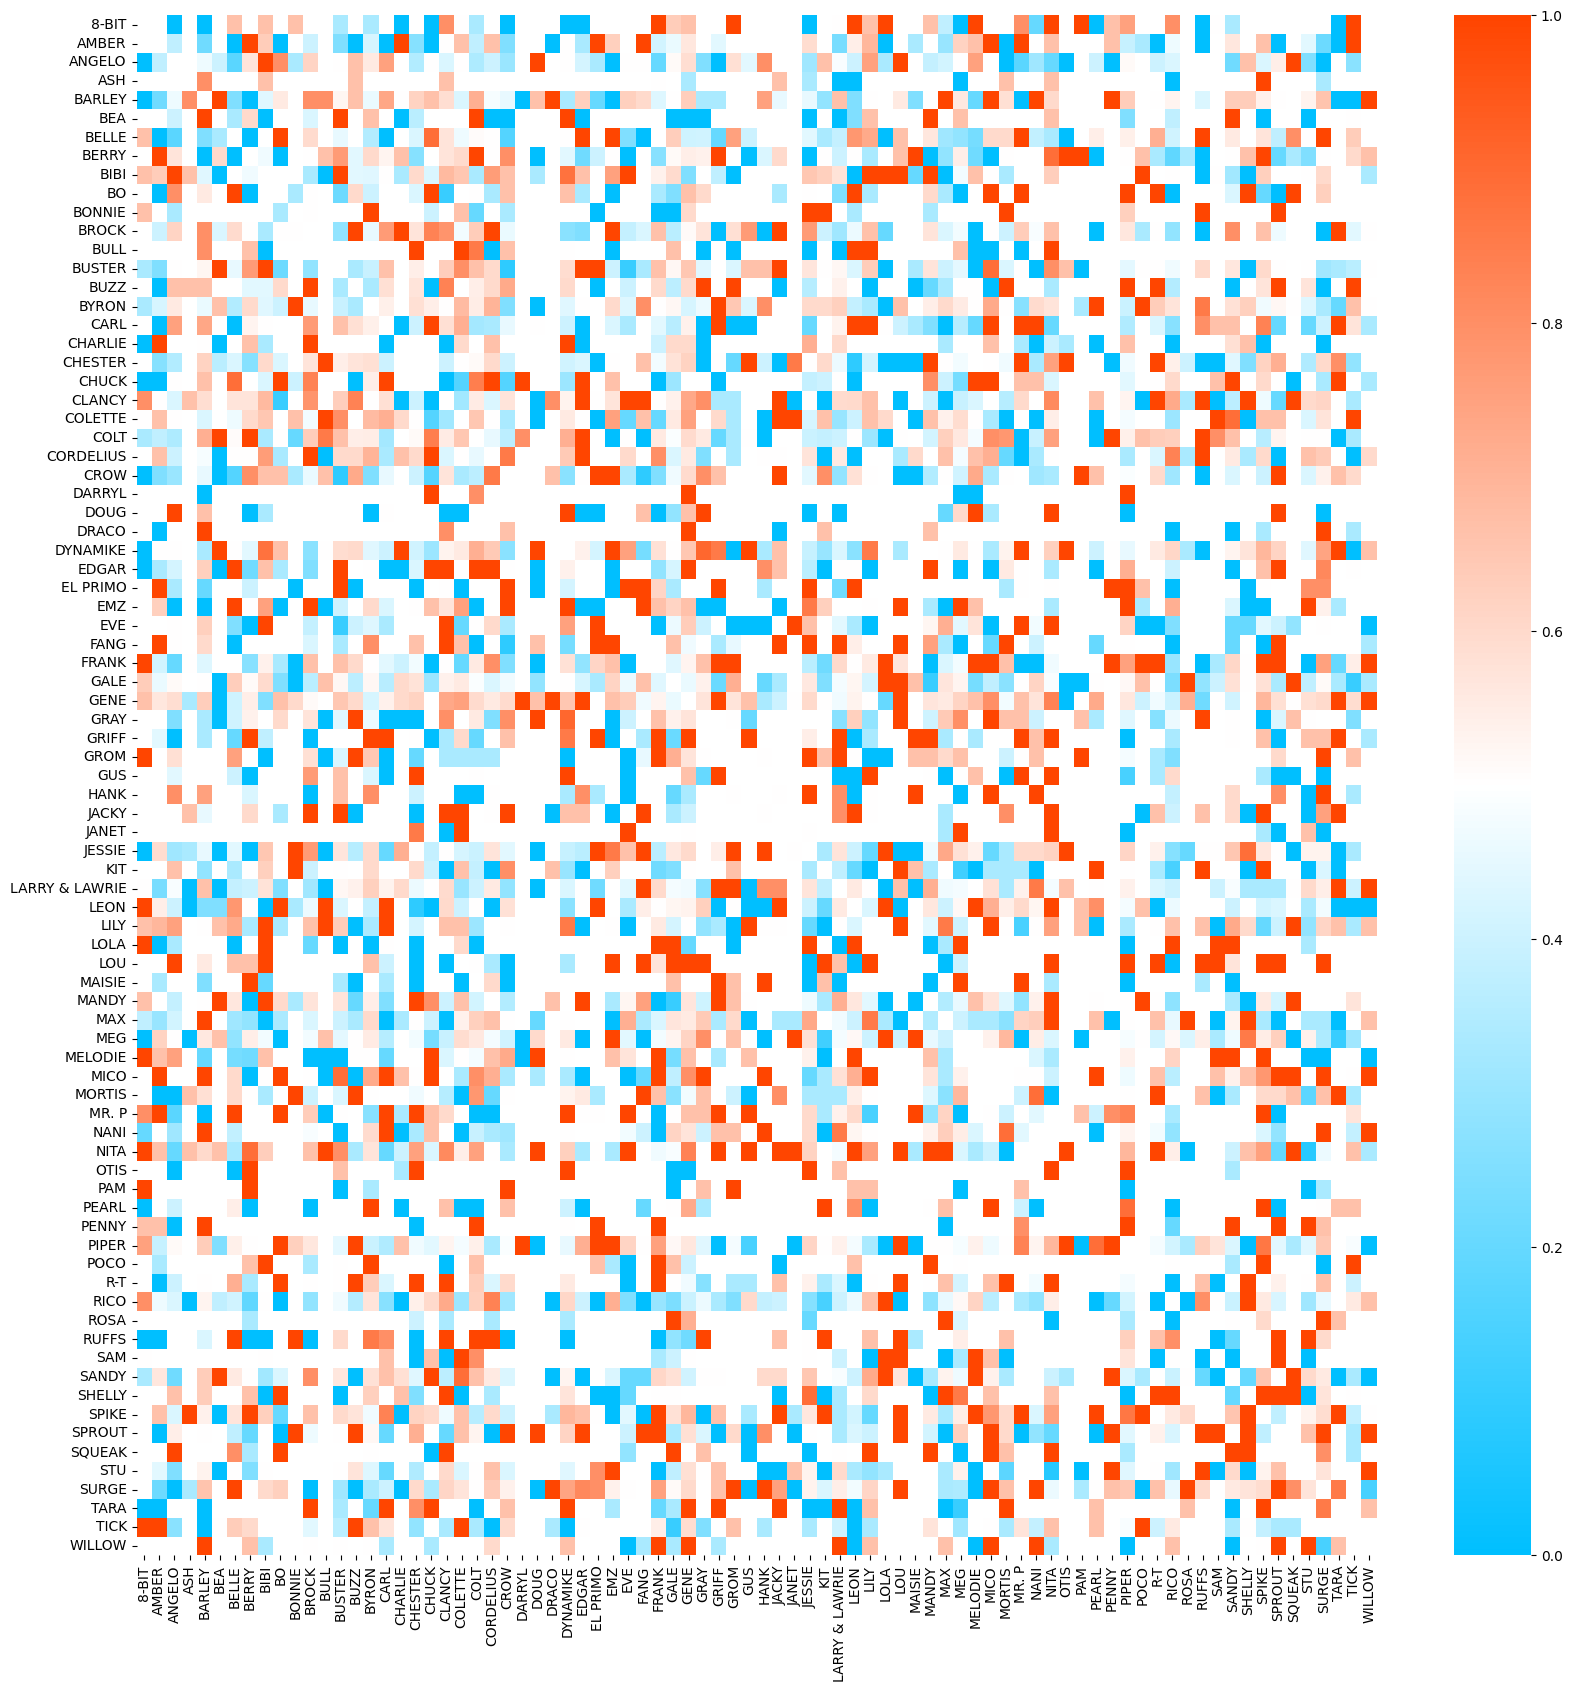

In [12]:
with_wins = pd.DataFrame(index=brawlers, columns=brawlers)
with_wins = with_wins.fillna(0)

with_games = pd.DataFrame(index=brawlers, columns=brawlers)
with_games = with_games.fillna(0)

for row in df.itertuples(index=False):
    victor = row[2]

    if victor == 0:
        continue

    team1 = row[3:6]
    team2 = row[6:9]

    for i in range(len(team1)):
        for j in range(i+1, len(team1)):    
            brawler1 = team1[i]
            brawler2 = team1[j]

            with_games.loc[brawler1, brawler2] += 1
            with_games.loc[brawler2, brawler1] += 1
        
            if victor == 1:
                with_wins.loc[brawler1, brawler2] += 1
                with_wins.loc[brawler2, brawler1] += 1

            brawler1 = team2[i]
            brawler2 = team2[j]

            with_games.loc[brawler1, brawler2] += 1
            with_games.loc[brawler2, brawler1] += 1
        
            if victor == 2:
                with_wins.loc[brawler1, brawler2] += 1
                with_wins.loc[brawler2, brawler1] += 1     
    
with_winrates = with_wins.div(with_games)

plt.figure(figsize=(20,20))
cmap = LinearSegmentedColormap.from_list('coolwarm_custom', ['#00BFFF', '#FFFFFF', '#FF4500'], N=256)
sns.heatmap(with_winrates, annot=False, cmap=cmap, vmin=0, vmax=1)

with_winrates.to_csv(os.path.join(output_dir, 'with_winrates.csv'))
with_games.to_csv(os.path.join(output_dir, 'with_games.csv'))
plt.savefig(os.path.join(output_dir, 'with_heatmap.png'), format='png', dpi=300, bbox_inches='tight')

display(with_winrates)
plt.show()